In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [9]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [11]:
# Normalize and reshape
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\vanam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8741 - loss: 0.4085 - val_accuracy: 0.9828 - val_loss: 0.0588
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9843 - loss: 0.0517 - val_accuracy: 0.9842 - val_loss: 0.0548
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9877 - loss: 0.0383 - val_accuracy: 0.9898 - val_loss: 0.0355
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9924 - loss: 0.0239 - val_accuracy: 0.9898 - val_loss: 0.0344
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9947 - loss: 0.0180 - val_accuracy: 0.9898 - val_loss: 0.0400


In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9883 - loss: 0.0344
Test accuracy: 0.9909


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


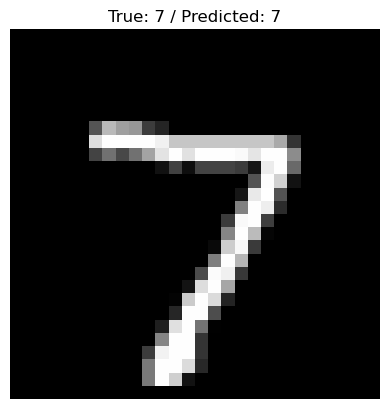

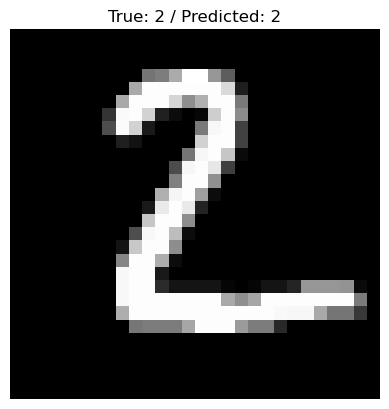

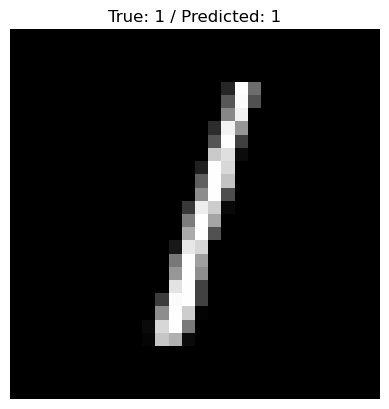

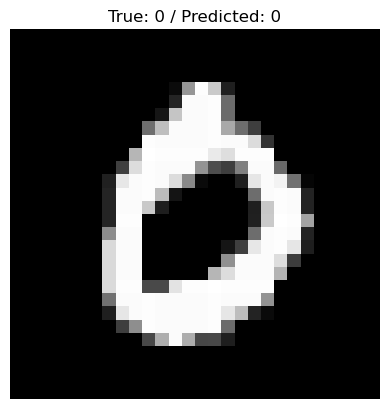

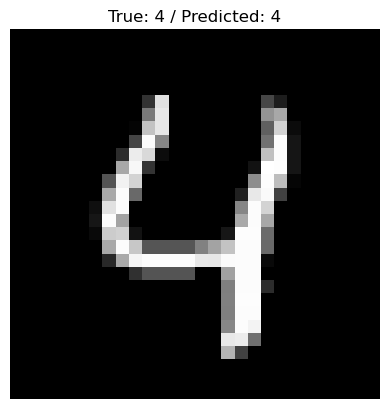

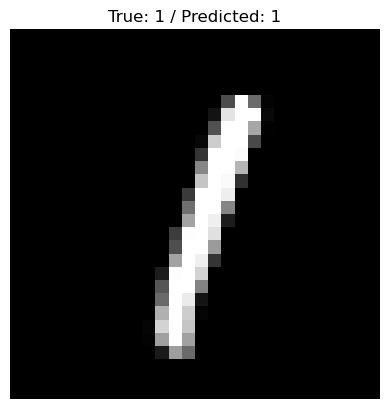

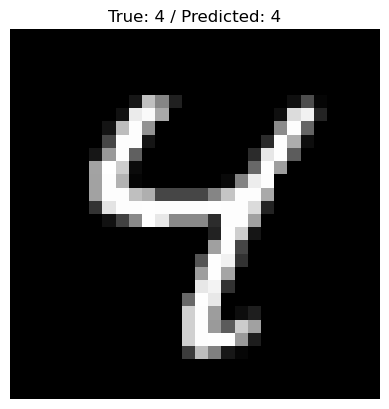

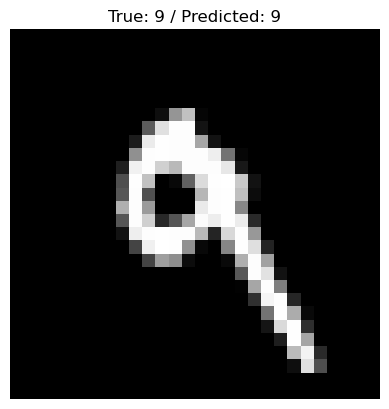

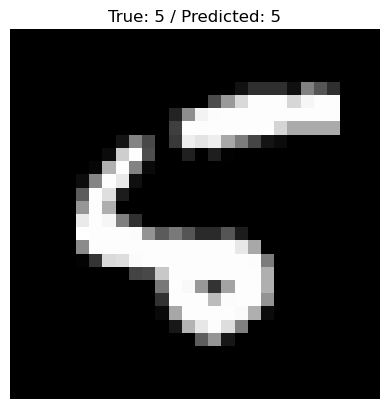

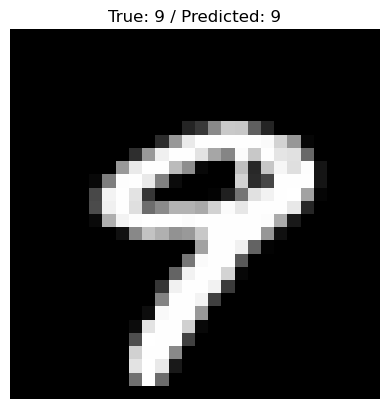

In [21]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

for i in range(10):
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {true_labels[i]} / Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

In [35]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Dropout(0.25),  

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),   # Fully connected katmandan önce daha güçlü dropout
    Dense(10, activation='softmax')
])

C:\Users\vanam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Capture training history
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Save the history for later use
import pickle
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.8298 - loss: 0.5375 - val_accuracy: 0.9857 - val_loss: 0.0502
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9689 - loss: 0.1022 - val_accuracy: 0.9887 - val_loss: 0.0385
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9777 - loss: 0.0724 - val_accuracy: 0.9912 - val_loss: 0.0336
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9821 - loss: 0.0581 - val_accuracy: 0.9915 - val_loss: 0.0312
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9843 - loss: 0.0520 - val_accuracy: 0.9928 - val_loss: 0.0255
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9853 - loss: 0.0471 - val_accuracy: 0.9897 - val_loss: 0.0308
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9881 - loss: 0.0386 - val_accuracy: 0.9935 - val_loss: 0.0270
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9876 - loss: 0.0386 - 

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy with dropout: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9902 - loss: 0.0310
Test accuracy with dropout: 0.9921


In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
y_true = np.argmax(y_test, axis=1)


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


<Figure size 800x800 with 0 Axes>

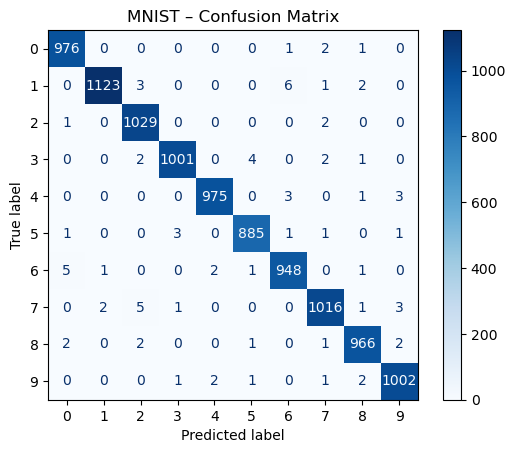

In [33]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title("MNIST – Confusion Matrix")
plt.show()

In [37]:
model.save('mnist_cnn_model.h5')

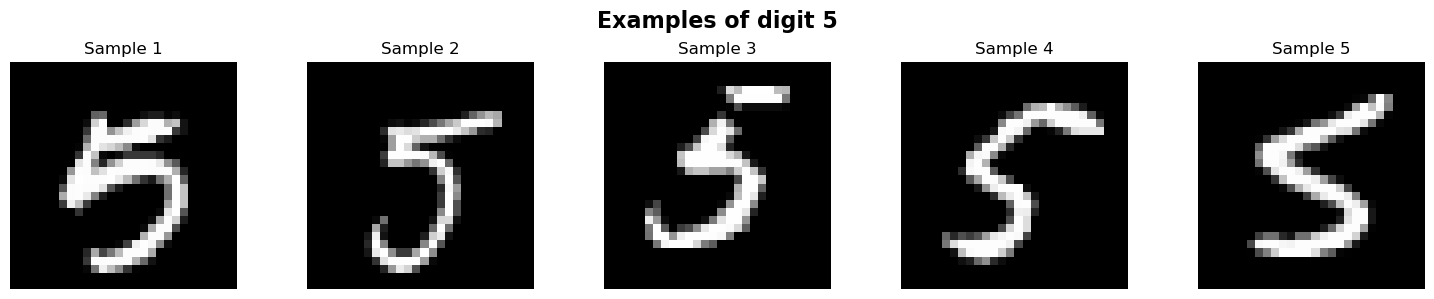

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def display_digit_examples(digit, num_samples=5):
    """
    Display examples of a specific digit from the test set
    """
    # Find indices where the true label matches the requested digit
    true_labels = np.argmax(y_test, axis=1)
    digit_indices = np.where(true_labels == digit)[0]
    
    if len(digit_indices) < num_samples:
        print(f"Only {len(digit_indices)} examples of digit {digit} available")
        num_samples = len(digit_indices)
    
    # Randomly select num_samples examples
    selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
    
    # Create the display
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    fig.suptitle(f'Examples of digit {digit}', fontsize=16, fontweight='bold')
    
    for i, idx in enumerate(selected_indices):
        axes[i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Sample {i+1}', fontsize=12)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
display_digit_examples(5, 5)